In [9]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/content/drive/MyDrive/공빅데_대전_87조/코드 /New_data_1.csv',sep=',',encoding = 'UTF-8')
data.columns

feature_names = ['bus_stop_num', 'bus_all', 'old_all', 'taxi_all', 'ratio']


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
from sklearn.mixture import GaussianMixture
DF = data[['bus_stop_num', 'bus_all', 'old_all', 'taxi_all']]

gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(DF)

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환


#DF1 = data[['택스_승차합', '택시_하차합', 'BUS_정류장_개수', 'BUS_탑승', 'BUS_하차','BUS_환승','고령인구 발생량','고령인구 도착량']]
# GMM 후 클러스터링 레이블을 따로 설정
DF['gmm_cluster'] = gmm_labels

# 실제 레이블과 GMM 클러스터링 후 레이블과 비교해보기(두 레이블 수치가 동일해야 똑같은 레이블 의미 아님!)
print(DF.groupby('gmm_cluster')['gmm_cluster'].value_counts())



gmm_cluster  gmm_cluster
0            0               37
1            1              138
2            2                1
Name: gmm_cluster, dtype: int64


In [22]:
from sklearn.mixture import GaussianMixture as GMM
import matplotlib.pyplot as plt

b = np.log(DF)

k= np.arange(1,10,1)
clfs= [GMM(n,covariance_type='full').fit(b) for n in k]
aics= [clf.aic(b) for clf in clfs]
bics= [clf.bic(b) for clf in clfs]
plt.plot(k,bics,color='orange',marker='.',label='BIC')
plt.plot(k,aics,color='g',label='AIC')
plt.legend()
plt.show() 

ValueError: ignored

In [ ]:
DF

,bus_stop_num,bus_all,old_all,taxi_all,ratio,gmm_cluster
0,7,978191,1904,19011,272.000000,1
1,9,200096,493,30751,54.777778,0
2,7,98540,54,12861,7.714286,0
3,10,71832,35,22742,3.500000,0
4,25,349997,250,68585,10.000000,0
...,...,...,...,...,...,...
172,0,0,0,0,0.000000,0
173,0,0,0,0,0.000000,0
174,8,1510,1,162,0.125000,0
175,11,4522,1,270,0.090909,0


In [ ]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*', '8', 's', 'p']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['bus_all'], y=label_cluster['ratio'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

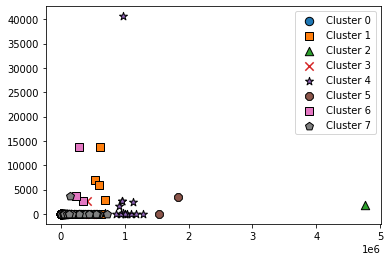

In [ ]:
gmm = GaussianMixture(n_components=8, random_state=0)
gmm_label = gmm.fit(DF).predict(DF)
DF['gmm_label'] = gmm_label 

visualize_cluster_plot(gmm , DF , 'gmm_label' , iscenter=False)

In [ ]:
# DF['gmm_cluster'].tolist()
DF.groupby('gmm_label').median() # ratio가 높고, bus_all이 높은 클러스터 10개 이상 뽑기 / 겹치는 법정동 리스트 뽑기

,bus_stop_num,bus_all,old_all,taxi_all,ratio,gmm_cluster
gmm_label,,,,,,
0,7.0,2984.0,2.0,125.0,0.315789,0.0
1,19.0,611832.0,76728.0,145046.0,5902.153846,1.0
2,72.0,4767342.0,138476.0,766681.0,1923.277778,2.0
3,26.0,459135.0,633.0,94038.0,25.320000,1.0
4,25.0,978191.0,1189.0,142957.0,46.571429,1.0
5,38.5,1691478.5,61696.0,264198.5,1808.995554,1.0
6,15.0,277166.5,65583.5,40758.5,3197.714286,1.0
7,13.0,169034.5,119.5,33650.5,9.704545,0.0


In [ ]:
DF.groupby('gmm_label').mean()

,bus_stop_num,bus_all,old_all,taxi_all,ratio,gmm_cluster
gmm_label,,,,,,
0,7.706667,1.328985e+04,6.613333,1794.346667,0.896849,0.000000
1,18.200000,6.126822e+05,98545.600000,115429.000000,5910.237962,1.000000
2,72.000000,4.767342e+06,138476.000000,766681.000000,1923.277778,2.000000
3,26.200000,4.577760e+05,18464.400000,112642.800000,531.406950,1.000000
4,23.600000,9.995815e+05,34299.600000,164304.133333,3369.115610,1.000000
5,38.500000,1.691478e+06,61696.000000,264198.500000,1808.995554,1.000000
6,16.750000,2.811735e+05,64050.000000,52998.000000,5061.851587,1.000000
7,14.242857,2.323206e+05,760.500000,39871.328571,63.156055,0.014286


In [ ]:
# pd.DataFrame(DF[gmm.fit(DF).predict(DF)==2])

cluster = pd.merge(DF[gmm.fit(DF).predict(DF)==2], data, how='inner')
rst = pd.DataFrame(cluster)
rst

,bus_stop_num,bus_all,old_all,taxi_all,ratio,gmm_cluster,gmm_label,Unnamed: 0,dong
0,72,4767342,138476,766681,1923.277778,2,2,81,서구 둔산동


In [ ]:
cluster = pd.merge(DF[gmm.fit(DF).predict(DF)==4], data, how='inner')
rst = pd.DataFrame(cluster)
rst

,bus_stop_num,bus_all,old_all,taxi_all,ratio,gmm_cluster,gmm_label,Unnamed: 0,dong
0,7,978191,1904,19011,272.000000,1,4,0,동구 원동
1,25,855992,747,178690,29.880000,1,4,13,동구 가양동
2,17,1099550,398,232871,23.411765,1,4,14,동구 용전동
3,9,945335,253,62534,28.111111,1,4,15,동구 성남동
4,6,966683,243650,118027,40608.333333,1,4,18,동구 정동
5,8,694306,1189,95292,148.625000,1,4,19,동구 중동
6,7,1006022,326,96756,46.571429,1,4,45,중구 은행동
7,28,911680,42712,206400,1525.428571,1,4,49,중구 대흥동
8,43,1287135,1097,142957,25.511628,1,4,60,중구 문화동
9,25,953013,66764,298355,2670.560000,1,4,76,서구 탄방동


In [ ]:
cluster = pd.merge(DF[gmm.fit(DF).predict(DF)==1], data, how='inner')
rst = pd.concat([rst, cluster])
rst

,bus_stop_num,bus_all,old_all,taxi_all,ratio,gmm_cluster,gmm_label,Unnamed: 0,dong
0,7,978191,1904,19011,272.000000,1,4,0,동구 원동
1,25,855992,747,178690,29.880000,1,4,13,동구 가양동
2,17,1099550,398,232871,23.411765,1,4,14,동구 용전동
3,9,945335,253,62534,28.111111,1,4,15,동구 성남동
4,6,966683,243650,118027,40608.333333,1,4,18,동구 정동
5,8,694306,1189,95292,148.625000,1,4,19,동구 중동
6,7,1006022,326,96756,46.571429,1,4,45,중구 은행동
7,28,911680,42712,206400,1525.428571,1,4,49,중구 대흥동
8,43,1287135,1097,142957,25.511628,1,4,60,중구 문화동
9,25,953013,66764,298355,2670.560000,1,4,76,서구 탄방동


In [ ]:
cluster = pd.merge(DF[gmm.fit(DF).predict(DF)==5], data, how='inner')
rst = pd.concat([rst, cluster])
rst

,bus_stop_num,bus_all,old_all,taxi_all,ratio,gmm_cluster,gmm_label,Unnamed: 0,dong
0,7,978191,1904,19011,272.000000,1,4,0,동구 원동
1,25,855992,747,178690,29.880000,1,4,13,동구 가양동
2,17,1099550,398,232871,23.411765,1,4,14,동구 용전동
3,9,945335,253,62534,28.111111,1,4,15,동구 성남동
4,6,966683,243650,118027,40608.333333,1,4,18,동구 정동
5,8,694306,1189,95292,148.625000,1,4,19,동구 중동
6,7,1006022,326,96756,46.571429,1,4,45,중구 은행동
7,28,911680,42712,206400,1525.428571,1,4,49,중구 대흥동
8,43,1287135,1097,142957,25.511628,1,4,60,중구 문화동
9,25,953013,66764,298355,2670.560000,1,4,76,서구 탄방동


In [ ]:
rst.to_csv('gmm_result_for_4cluster.csv')

In [ ]:
# from sklearn.preprocessing import StandardScaler
# x_1 = StandardScaler().fit_transform(x)

# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# principalComponents = pca.fit_transform(DF1)
# principalDf1 = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2'])

In [ ]:
# principalDf1

In [ ]:
# pd.concat([DF,principalDf1], axis = 1)

In [ ]:
# gmm = GaussianMixture(n_components=3, random_state=0)
# gmm_label = gmm.fit(DF).predict(DF)
# DF['gmm_label'] = gmm_label 

# visualize_cluster_plot(gmm , DF , 'gmm_label' , iscenter=False)